# **MAE598 Homework 2**

### Q1. Vapor-liquid equilibria data are correlated using two adjustable parameters A12 and A21 per binary mixture. For low pressures, the equilibrium relation can be formulated as



$$ p=x_1 exp (A_{12}(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2})^2)p_1^{sat} + x_2 exp (A_{21}(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2})^2)p_2^{sat}$$<br/>

###Here the saturation pressures are given by the Antoine equation

$$ log_{10}(p^{sat})=a_1-\frac{a_2}{T+a_3} $$<br/>

### where T = $20(^◦$C) and a1,2,3 for a water - 1,4 dioxane system is given below
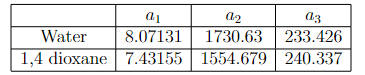


###The following table lists the measured data $(x1 + x2 = 1). x1$ is for water

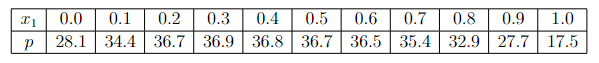

###Estimate $A_{12}$ and $A_{21}$ using data from Table 1:
###(1) Formulate the least square problem
###(2) Since the model is nonlinear, the problem does not have an analytical solution.Therefore, solve it using the gradient descent or Newton’s method implemented in HW1
###(3) Compare your optimized model with the data. Does your model fit well with the data?



##Answer-

###For the 1 sub-question we will formulate the least square problem, from the question we have the equilibrium relation formula


$$ p=x_1 exp (A_{12}(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2})^2)p_1^{sat} + x_2 exp (A_{21}(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2})^2)p_2^{sat}$$<br/>

where $p_1^{sat}=p_{water}^{sat}, p_2^{sat}=p_{1,4,dioxane}^{sat}$

###since we know the actual $p$ values,the least square problem can be given by,

$$ \underset{A_{12},A_{21}}{min}\sum_{i=1}^{11}(pf(i)-p(i))^2$$<br/>


###Solving least squares using gradient descent,

estimated A12 and A21 is  tensor([1.9418, 1.7030], requires_grad=True)
loss is  0.6950508


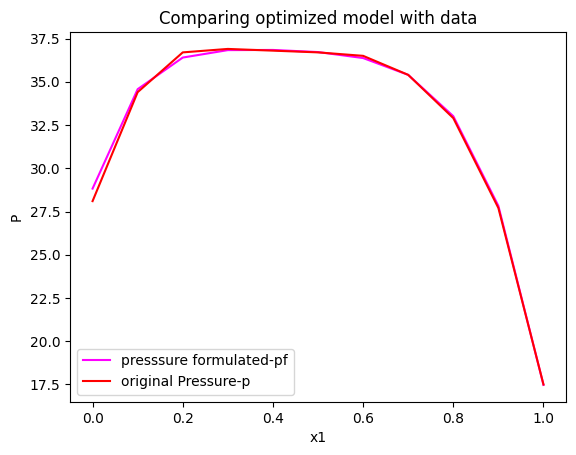

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display
x_1=np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x_2=np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])
aw=np.array([8.07131, 1730.63, 233.426])
ad=np.array([7.43155, 1554.679, 240.337])
t=20
pw=10**(aw[0]-aw[1]/(t+aw[2]))
pd=10**(ad[0]-ad[1]/(t+ad[2]))
p=np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])
p=torch.tensor(p,requires_grad=False,dtype=torch.float32)
A=Variable(torch.tensor([1.0, 1.0]),requires_grad=True)
x1=torch.tensor(x_1,requires_grad=False,dtype=torch.float32)
x2=torch.tensor(x_2,requires_grad=False,dtype=torch.float32)
a=.0001
for i in range(200):
    pf=x1*torch.exp(A[0]*(A[1]*x2/(A[0]*x1+A[1]*x2))**2)*pw + x2*torch.exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*x2))**2)*pd
    loss=(pf-p)**2
    loss=loss.sum()
    loss.backward()
    with torch.no_grad():
            A-=a*A.grad
            A.grad.zero_()
print('estimated A12 and A21 is ',A)
print('loss is ',loss.data.numpy())
pf=pf.detach().numpy()
p=p.detach().numpy()
x1= x1.detach().numpy()
plt.plot(x1,pf,label='presssure formulated-pf',color='magenta')
plt.plot(x1,p,label='original Pressure-p',color='red')
plt.xlabel('x1')
plt.ylabel('P')
plt.legend()
plt.title('Comparing optimized model with data')
plt.show()

###From the graph it be can seen that the optimized model fits well with the data.

### Q2. Solve the following problem using Bayesian Optimization:

$$ \underset{x_{1},x_{2}}{min}(4-2.1x_1^2+\frac{x_1^4}{3})x_1^2+x_1x_2+(-4+4x_2^2)x_2^2$$<br/>

###for $x_1∈|-3,3|$ and $x_2∈|-2,2|$. You can use an off-the-shelf Bayesian Optimization solver

##Answer-

###Bayesian Optimization using openbox solver,

In [6]:
pip install openbox

In [8]:

import numpy as np
from openbox import Optimizer, sp

# Define Search Space
space = sp.Space()
x1 = sp.Real("x1", -3, 3, default_value=1)
x2 = sp.Real("x2", -2, 2, default_value=1)
space.add_variables([x1, x2])

# Define Objective Function
def branin(config):
    x1, x2 = config['x1'], config['x2']
    y = (4-2.1*x1**2+((x1**4)/3))*x1**2+x1*x2+(-4+4*x2**2)*x2**2
    return y

# Run
if __name__ == '__main__':
    opt = Optimizer(branin, space, max_runs=50, task_id='quick_start')
    history = opt.run()
    print(history)

[2023-11-27 21:18:09,903][quick_start][INFO][color_logger.py:203] Logfile: /content/logs/quick_start_2023-11-27-21-18-09-901822.log
[2023-11-27 21:18:09,941][quick_start][INFO][generic_advisor.py:157] [BO auto selection]  surrogate_type: gp. acq_type: ei. acq_optimizer_type: random_scipy.
  0%|          | 0/50 [00:00<?, ?it/s][2023-11-27 21:18:09,964][quick_start][WARNING][util_funcs.py:126] Provide result as <dict> that contains "objectives" is recommended, got <class 'float'>
[2023-11-27 21:18:09,975][quick_start][WARNING][util_funcs.py:73] The shape of objectives is changed from () to (1,).
[2023-11-27 21:18:09,985][quick_start][INFO][generic_smbo.py:295] Iter 1, objectives: [3.2333333333333334].
[2023-11-27 21:18:09,995][quick_start][WARNING][util_funcs.py:126] Provide result as <dict> that contains "objectives" is recommended, got <class 'float'>
[2023-11-27 21:18:10,005][quick_start][WARNING][util_funcs.py:73] The shape of objectives is changed from () to (1,).
[2023-11-27 21:18:

+-------------------------+---------------+
| Parameters              | Optimal Value |
+-------------------------+---------------+
| x1                      | 0.032046      |
| x2                      | -0.704570     |
+-------------------------+---------------+
| Optimal Objective Value | -1.018422     |
+-------------------------+---------------+
| Num Trials              | 50            |
+-------------------------+---------------+


### Therefore, among 50 iterations,the minimum objective value is -1.018422 and the corresponding x1 and x2 are 0.032046  and -0.704570  respectively

### Now we will be performing using a different Bayesian Optimization solver(Thomas Huijskens),

In [10]:
import numpy as np
import sklearn.gaussian_process as gp

from scipy.stats import norm
from scipy.optimize import minimize

def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):
    """ expected_improvement
    Expected improvement acquisition function.
    Arguments:
    ----------
        x: array-like, shape = [n_samples, n_hyperparams]
            The point for which the expected improvement needs to be computed.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: Numpy array.
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        n_params: int.
            Dimension of the hyperparameter space.
    """

    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement


def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):
    """ sample_next_hyperparameter
    Proposes the next hyperparameter to sample the loss function for.
    Arguments:
    ----------
        acquisition_func: function.
            Acquisition function to optimise.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: array-like, shape = [n_obs,]
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        bounds: Tuple.
            Bounds for the L-BFGS optimiser.
        n_restarts: integer.
            Number of times to run the minimiser with different starting points.
    """
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x


def bayesian_optimisation(n_iters, sample_loss, bounds, x0=None, n_pre_samples=5,
                          gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7):
    """ bayesian_optimisation
    Uses Gaussian Processes to optimise the loss function `sample_loss`.
    Arguments:
    ----------
        n_iters: integer.
            Number of iterations to run the search algorithm.
        sample_loss: function.
            Function to be optimised.
        bounds: array-like, shape = [n_params, 2].
            Lower and upper bounds on the parameters of the function `sample_loss`.
        x0: array-like, shape = [n_pre_samples, n_params].
            Array of initial points to sample the loss function for. If None, randomly
            samples from the loss function.
        n_pre_samples: integer.
            If x0 is None, samples `n_pre_samples` initial points from the loss function.
        gp_params: dictionary.
            Dictionary of parameters to pass on to the underlying Gaussian Process.
        random_search: integer.
            Flag that indicates whether to perform random search or L-BFGS-B optimisation
            over the acquisition function.
        alpha: double.
            Variance of the error term of the GP.
        epsilon: double.
            Precision tolerance for floats.
    """

    x_list = []
    y_list = []

    n_params = bounds.shape[0]

    if x0 is None:
        for params in np.random.uniform(bounds[:, 0], bounds[:, 1], (n_pre_samples, bounds.shape[0])):
            x_list.append(params)
            y_list.append(sample_loss(params))
    else:
        for params in x0:
            x_list.append(params)
            y_list.append(sample_loss(params))

    xp = np.array(x_list)
    yp = np.array(y_list)

    # Create the GP
    if gp_params is not None:
        model = gp.GaussianProcessRegressor(**gp_params)
    else:
        kernel = gp.kernels.Matern()
        model = gp.GaussianProcessRegressor(kernel=kernel,
                                            alpha=alpha,
                                            n_restarts_optimizer=10,
                                            normalize_y=True)

    for n in range(n_iters):

        model.fit(xp, yp)

        # Sample next hyperparameter
        if random_search:
            x_random = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(random_search, n_params))
            ei = -1 * expected_improvement(x_random, model, yp, greater_is_better=True, n_params=n_params)
            next_sample = x_random[np.argmax(ei), :]
        else:
            next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, bounds=bounds, n_restarts=100)

        # Duplicates will break the GP. In case of a duplicate, we will randomly sample a next query point.
        if np.any(np.abs(next_sample - xp) <= epsilon):
            next_sample = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds.shape[0])

        # Sample loss for new set of parameters
        cv_score = sample_loss(next_sample)

        # Update lists
        x_list.append(next_sample)
        y_list.append(cv_score)

        # Update xp and yp
        xp = np.array(x_list)
        yp = np.array(y_list)

    return xp, yp
def sample_loss(params):
    return (4 - 2.1 * params[0] ** 2 + ((params[0] ** 4 )/ 3)) * params[0] ** 2 + params[0] * params[1] + (-4 + 4 * params[1] ** 2) * params[1] ** 2
bounds = np.array([[-3, 3], [-2, 2]])
xp, yp = bayesian_optimisation(n_iters=20,sample_loss=sample_loss,bounds=bounds,n_pre_samples=30,random_search=50000)
print('minimum objective value:',np.min(yp))
print('corresponding x1,x2:',xp[np.argmin(yp)])
print('function value',yp,'x values', xp,)

minimum objective value: -0.6288920131631819
corresponding x1,x2: [-0.07139421 -0.87659384]
function value [ 4.50064680e+01 -6.28892013e-01  8.36628340e-01  2.33209464e+01
  3.91356020e+01  1.41922082e+01  8.00421632e+00  3.79686518e+01
  2.22078993e+00  2.46438708e+00  3.18995833e+00  2.05122729e+01
  3.62574737e+01  2.24769829e+00  2.00357455e+00  9.26624599e+01
  3.57935032e+00  1.99488296e+01  6.61707260e-02  1.45106729e+01
  4.11615596e+01  7.34627815e+00  1.76219760e+01  2.16217835e+00
  4.45018595e+00  7.96515110e-01  1.35443473e+00  1.24827056e+00
  9.45271067e+01  2.36568476e+00  1.07977326e+02  1.04123661e+02
  1.07748657e+02  1.59723285e+02  1.40138362e+02  1.57034206e+02
  1.60897894e+02  1.43126986e+02  1.10373512e+02  8.02841542e+01
  1.38667680e+02  1.55356160e+02  1.47009747e+02  1.10161038e+02
  1.13509020e+02  1.07066402e+02  1.09593461e+02  1.06330623e+02
  1.62369959e+02  4.91751374e+01] x values [[ 2.18819482 -1.94048467]
 [-0.07139421 -0.87659384]
 [ 0.77438664 -0

### Q3. Read the ANSYS DOE and Design Optimization Tutorial. Choose ONE of the analyses (structural, modal, or thermal) and optimize the related objective (e.g., minimize the maximum Von Mises stress, maximize the first natural frequency, or minimize the maximum temperature) with respect to geometry parameters. Please report the followings:

*   What are your design variables, constraints, and objectives?
*   What design of experiment method do you use?
*   What response surface method do you use?
*   How do you validate your response surface?
*   What optimization method do you use?
*   How do you validate your optimal solution?




##Answer

Personally i think introducing a new ventilation slot to reduce thermal stress might help.


### 1. What are your design variables, constraints, and objectives?
--> Designing variables - Inner disc radius, Outer disc radius, Thickness;

Objective - $min (σ_{max})$ where $σ_{max}$ is the maximum von mises stress

Constraints - g1 : −P1 ≤ −66;
g2 : P1 ≤ 90;
g3 : −P2 ≤ −124;
g4 : P2 ≤ 150;
g5 : −P3 ≤ −5;
g6 : P3 ≤ 27;
g7 : S ≤ 14MP a

### 2. What design of experiment method do you use?
--> Taguchi Method
Because-

1.   Focuses on robust parameter design to minimize variation and ensure robust performance.
2.   Uses an orthogonal array to study multiple factors simultaneously with a minimal number of experiments.

### 3. What response surface method do you use?
-->Kriging (Gaussian Process Regression):

1.    Kriging is a powerful technique for response surface modeling.
2.    It provides predictions along with uncertainty estimates.
3.    Especially useful when the response surface is complex or exhibits non-linear behavior.

###4. How do you validate your response surface?
-->Cross-Validation:

1.   Perform cross-validation by splitting the dataset into training and validation sets.
2.   Train the response surface model using the training set and validate its performance on the validation set.
3.   Assess how well the model generalizes to new, unseen data.

###5. What optimization method do you use?
-->Sequential Quadratic Programming (SQP):

1.   Sequential optimization technique that approximates the objective function with a quadratic model.
2.   Suitable for constrained optimization problems.


###6. How do you validate your optimal solution?
--->Durability and Fatigue Analysis:

1.    Assess the durability and fatigue life of the brake disc under cyclic loading conditions.
2.   Ensure that the optimal design can withstand repeated braking cycles without failure.


